<a href="https://colab.research.google.com/github/Sneha-jain2901/Reinforcement-Learning/blob/main/NN_SARSA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install gymnasium

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 958.1/958.1 kB 32.7 MB/s eta 0:00:00


In [ ]:
import gymnasium as gym
import numpy as np
import tensorflow as tf
import cv2

from IPython.display import clear_output,display
from IPython.display import Image
import matplotlib.pyplot as plt

from keras import Model, Input
from keras.layers import Dense

In [ ]:
env=gym.make("CartPole-v1",render_mode="rgb_array")

Random agent for exploring the environment

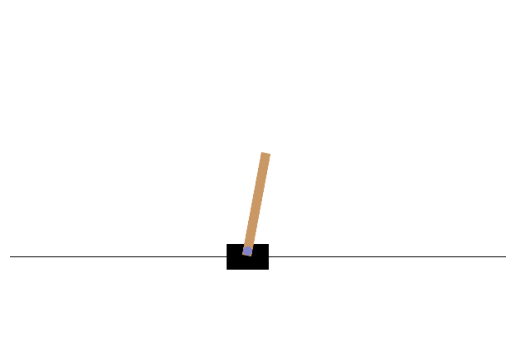

Episode: 5, Total Reward: 12.0


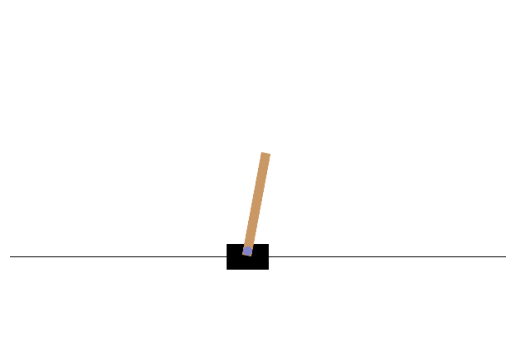

In [ ]:
episodes =5
for episode in range(episodes):
  done=False
  state=env.reset()
  total_reward=0
  while not done:
    frame=env.render()
    clear_output(wait=True)
    plt.imshow(frame)
    plt.axis('off')
    display(plt.gcf())
    # we give shape as an empty tupple cuz we need a scalar number and .numpy() to get integer value of that
    action=tf.random.uniform(shape=(), minval=0,maxval=2,dtype=tf.int32).numpy()
    state,reward,terminated,truncated,info=env.step(action)
    total_reward+=reward
    done=terminated or truncated
  print(f"Episode: {episode+1}, Total Reward: {total_reward}")
env.close()

Semi gradient SASRA

In [ ]:
#Q-Network
#input layer of shape 4 cuz our observation is a vector of 4 elements
net_input = Input(shape=(4,))
# define a fully connnected layer of 64 neuron
x=Dense(64,activation="relu")(net_input)
x= Dense(32,activation="linear")(x)
output=Dense(2,activation="linear")(x)
q_net=Model(inputs=net_input,outputs=output)

#PARAMETERS
alpha=0.001
epsilon=1.0
epsilon_decay=1.001
gamma=0.09
episodes=500

for episode in range(episodes):
  done=False
  total_reward=0
  ep_len=0
  observation,_ = env.reset()  # Returns a dictionary
  state = tf.convert_to_tensor([observation])
  action =policy(state,epsilon)
  while not done:
    next_state,reward,terminated,truncated,info=env.step(action.numpy())
    done=terminated or truncated
    next_state=tf.convert_to_tensor([next_state])
    next_action=policy(next_state,epsilon)
    #calculate target

    target=reward+gamma*q_net(next_state)[0][next_action]
    if done:
      target=reward

    with tf.GradientTape() as tape:
      current=q_net(state)
    grads=tape.gradient(current,q_net.trainable_weights)
    delta=target-current[0][action]

    for j in range(len(grads)):
      q_net.trainable_weights[j].assign_add(alpha*delta*grads[j])
    state=next_state
    action=next_action

    total_reward+=reward
    ep_len+=1
  epsilon/=epsilon_decay
  print(f"Episode: {episode+1}, Total Reward: {total_reward}, Episode Length: {ep_len} Epsilon: {epsilon}")
env.close()

Episode: 1, Total Reward: 8.0, Episode Length: 8 Epsilon: 0.09990009990009992
Episode: 2, Total Reward: 9.0, Episode Length: 9 Epsilon: 0.09980029960049942
Episode: 3, Total Reward: 10.0, Episode Length: 10 Epsilon: 0.09970059900149794
Episode: 4, Total Reward: 11.0, Episode Length: 11 Epsilon: 0.09960099800349446
Episode: 5, Total Reward: 9.0, Episode Length: 9 Epsilon: 0.09950149650698749
Episode: 6, Total Reward: 9.0, Episode Length: 9 Epsilon: 0.09940209441257493
Episode: 7, Total Reward: 9.0, Episode Length: 9 Epsilon: 0.09930279162095398
Episode: 8, Total Reward: 11.0, Episode Length: 11 Epsilon: 0.09920358803292108
Episode: 9, Total Reward: 8.0, Episode Length: 8 Epsilon: 0.09910448354937172
Episode: 10, Total Reward: 10.0, Episode Length: 10 Epsilon: 0.09900547807130043
Episode: 11, Total Reward: 9.0, Episode Length: 9 Epsilon: 0.09890657149980064
Episode: 12, Total Reward: 12.0, Episode Length: 12 Epsilon: 0.09880776373606459
Episode: 13, Total Reward: 10.0, Episode Length: 10

In [ ]:
def policy(state,epsilon=0.0):
  action=tf.argmax(q_net(state)[0],output_type=tf.int32)
  if tf.random.uniform(shape=(),minval=0,maxval=1)<=epsilon:
    action=tf.random.uniform(shape=(),minval=0,maxval=2,dtype=tf.int32)
  return action

EVALUATOR

In [ ]:
for episode in range(5):
  done = False
  observation,_=env.reset()
  state= tf.convert_to_tensor([observatioon])
  while not done:
    frame=env.render()
    clear_output(wait=True)
    plt.imshow(frame)
    plt.axis('off')
    display(plt.gcf())
    action=policy(state);
    state,reward,terminated,truncated,info=env.step(action.numpy())
    done=terminated or truncated
    state=tf.convert_to_tensor([state])
env.close()